In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

STEP 6.C

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


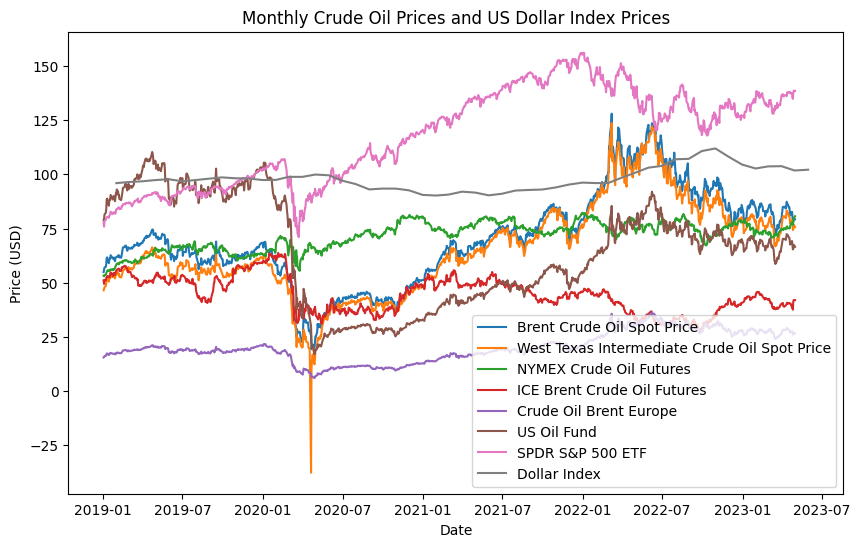

In [ ]:
# Define the list of tickers to download
tickers = ['BZ=F', 'CL=F', 'CL', 'B', 'BNO', 'USO', 'SPY']

# Download historical price data for the tickers
prices = yf.download(tickers, start='2019-01-01', end='2023-05-02')['Adj Close']
data_dollar = yf.download('DX-Y.NYB', start='2019-01-01', end='2023-05-02')

# Preprocess the data
prices = prices.fillna(method='ffill')
prices = prices.dropna()
data_dollar.dropna(inplace=True)  # Remove any missing data
data_dollar = data_dollar.resample('M').mean()  # Resample data to monthly frequency and calculate the mean
prices['SPY'] = prices['SPY']/3
# Plot the historical prices
plt.figure(figsize=(10, 6))
plt.plot(prices['BZ=F'], label='Brent Crude Oil Spot Price')
plt.plot(prices['CL=F'], label='West Texas Intermediate Crude Oil Spot Price')
plt.plot(prices['CL'], label='NYMEX Crude Oil Futures')
plt.plot(prices['B'], label='ICE Brent Crude Oil Futures')
plt.plot(prices['BNO'], label='Crude Oil Brent Europe')
plt.plot(prices['USO'], label='US Oil Fund')
plt.plot(prices['SPY'], label='SPDR S&P 500 ETF')
plt.plot(data_dollar.index, data_dollar['Close'], label='Dollar Index')  # Plot the dollar index data

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Monthly Crude Oil Prices and US Dollar Index Prices')  # Set title
plt.legend()
plt.show()


STEP 4.C

In [ ]:
# Define the list of tickers to download
tickers = ['BZ=F', 'CL=F', 'CL', 'B', 'BNO', 'USO', 'SPY', 'DX-Y.NYB']

# Download historical price data for the tickers
prices = yf.download(tickers, start='2019-01-01', end='2023-05-02')['Adj Close']

# Select the adjusted closing prices for selected dates
dates = ['2019-01-02', '2020-01-02', '2021-01-04', '2022-01-03', '2023-01-03']
prices_select = prices.loc[dates]

# Format the table
prices_select = prices_select.transpose()
prices_select.columns = pd.to_datetime(prices_select.columns).strftime('%Y-%m-%d')
prices_select.index.name = 'Ticker'

# Add a legend
legend = {'BZ=F': 'Brent Crude Oil Spot Price',
          'CL=F': 'West Texas Intermediate Crude Oil Spot Price',
          'CL': 'NYMEX Crude Oil Futures',
          'B': 'ICE Brent Crude Oil Futures',
          'BNO': 'Crude Oil Brent Europe',
          'USO': 'US Oil Fund',
          'SPY': 'SPDR S&P 500 ETF',
          'DX-Y.NYB': 'US Dollar Index'}


# Print the table
prices_select


[*********************100%***********************]  8 of 8 completed


Date,2019-01-02,2020-01-02,2021-01-04,2022-01-03,2023-01-03
Ticker,,,,,
B,51.089478,60.265018,47.010300,46.334068,41.044529
BNO,15.560000,20.969999,12.640000,21.160000,27.129999
BZ=F,54.910000,66.250000,51.090000,78.980003,82.099998
CL,53.199142,62.716709,79.486763,81.553436,78.136093
CL=F,46.540001,61.180000,47.619999,76.080002,76.930000
DX-Y.NYB,96.820000,96.849998,89.879997,96.239998,104.519997
SPY,233.171707,308.517426,356.767120,468.296417,379.372131
USO,78.800003,102.480003,32.380001,54.830002,67.639999


In [ ]:
data = {
    'Brent Crude Oil Spot Price': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'The spot price of Brent crude oil, which is the most widely used benchmark for global oil prices.'
    },
    'West Texas Intermediate Crude Oil Spot Price': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'The spot price of West Texas Intermediate (WTI) crude oil, which is the benchmark for oil prices in the United States.'
    },
    'NYMEX Crude Oil Futures': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'Futures contracts traded on the New York Mercantile Exchange (NYMEX) for delivery of WTI crude oil.'
    },
    'ICE Brent Crude Oil Futures': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'Futures contracts traded on the Intercontinental Exchange (ICE) for delivery of Brent crude oil.'
    },
    'Crude Oil Brent Europe': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'An exchange-traded fund (ETF) that tracks the price of Brent crude oil futures.'
    },
    'US Oil Fund': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'An ETF that tracks the price of WTI crude oil futures.'
    },
    'SPDR S&P 500 ETF': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'An ETF that tracks the performance of the S&P 500 index.'
    },
    'US Dollar Index': {
        'frequency': 'Daily',
        'source': 'Yahoo Finance',
        'start_date': '2019-01-01',
        'end_date': '2023-05-02',
        'description': 'A measure of the value of the United States dollar relative to a basket of foreign currencies.'
    }
}

# Convert the dictionary to a pandas DataFrame
table = pd.DataFrame.from_dict(data, orient='index')

# Print the table
print(table)

                                             frequency         source  \
Brent Crude Oil Spot Price                       Daily  Yahoo Finance   
West Texas Intermediate Crude Oil Spot Price     Daily  Yahoo Finance   
NYMEX Crude Oil Futures                          Daily  Yahoo Finance   
ICE Brent Crude Oil Futures                      Daily  Yahoo Finance   
Crude Oil Brent Europe                           Daily  Yahoo Finance   
US Oil Fund                                      Daily  Yahoo Finance   
SPDR S&P 500 ETF                                 Daily  Yahoo Finance   
US Dollar Index                                  Daily  Yahoo Finance   

                                              start_date    end_date  \
Brent Crude Oil Spot Price                    2019-01-01  2023-05-02   
West Texas Intermediate Crude Oil Spot Price  2019-01-01  2023-05-02   
NYMEX Crude Oil Futures                       2019-01-01  2023-05-02   
ICE Brent Crude Oil Futures                   2019-01-

In [ ]:
# Add a legend
legend = {'BZ=F': 'Brent Crude Oil Spot Price',
          'CL=F': 'West Texas Intermediate Crude Oil Spot Price',
          'CL.1': 'Crude Oil Continuous Contract',
          'CL': 'NYMEX Crude Oil Futures',
          'B': 'ICE Brent Crude Oil Futures',
          'BNO': 'Crude Oil Brent Europe',
          'USO': 'US Oil Fund',
          'SPY': 'SPDR S&P 500 ETF',
          'DXY': 'US Dollar Index'}

# Print the legend
for symbol, name in legend.items():
    print(symbol + ': ' + name)

BZ=F: Brent Crude Oil Spot Price
CL=F: West Texas Intermediate Crude Oil Spot Price
CL.1: Crude Oil Continuous Contract
CL: NYMEX Crude Oil Futures
B: ICE Brent Crude Oil Futures
BNO: Crude Oil Brent Europe
USO: US Oil Fund
SPY: SPDR S&P 500 ETF
DXY: US Dollar Index


STEP 5.C

In [ ]:
# Define the list of tickers to download
tickers = ['BZ=F', 'CL=F', 'CL', 'B', 'BNO', 'USO', 'SPY', 'DX-Y.NYB']

# Download historical price data for the tickers
prices = yf.download(tickers, start='2019-01-01', end='2023-05-02')['Adj Close']

# Handle missing values using linear interpolation
prices = prices.interpolate(method='linear')

# Rename the columns using a legend
prices.columns = [legend.get(col, col) for col in prices.columns]

# Print the first 10 rows of the data
print(prices.head(10))

[*********************100%***********************]  8 of 8 completed
            ICE Brent Crude Oil Futures  Crude Oil Brent Europe  \
Date                                                              
2019-01-02                    51.089478               15.560000   
2019-01-03                    49.423210               15.780000   
2019-01-04                    51.098885               16.180000   
2019-01-07                    51.136543               16.260000   
2019-01-08                    52.115597               16.559999   
2019-01-09                    52.661613               17.330000   
2019-01-10                    53.085232               17.389999   
2019-01-11                    53.141724               17.070000   
2019-01-14                    52.586304               16.680000   
2019-01-15                    52.463917               17.120001   

            Brent Crude Oil Spot Price  NYMEX Crude Oil Futures  \
Date                                                       

STEP 6.C

[*********************100%***********************]  8 of 8 completed


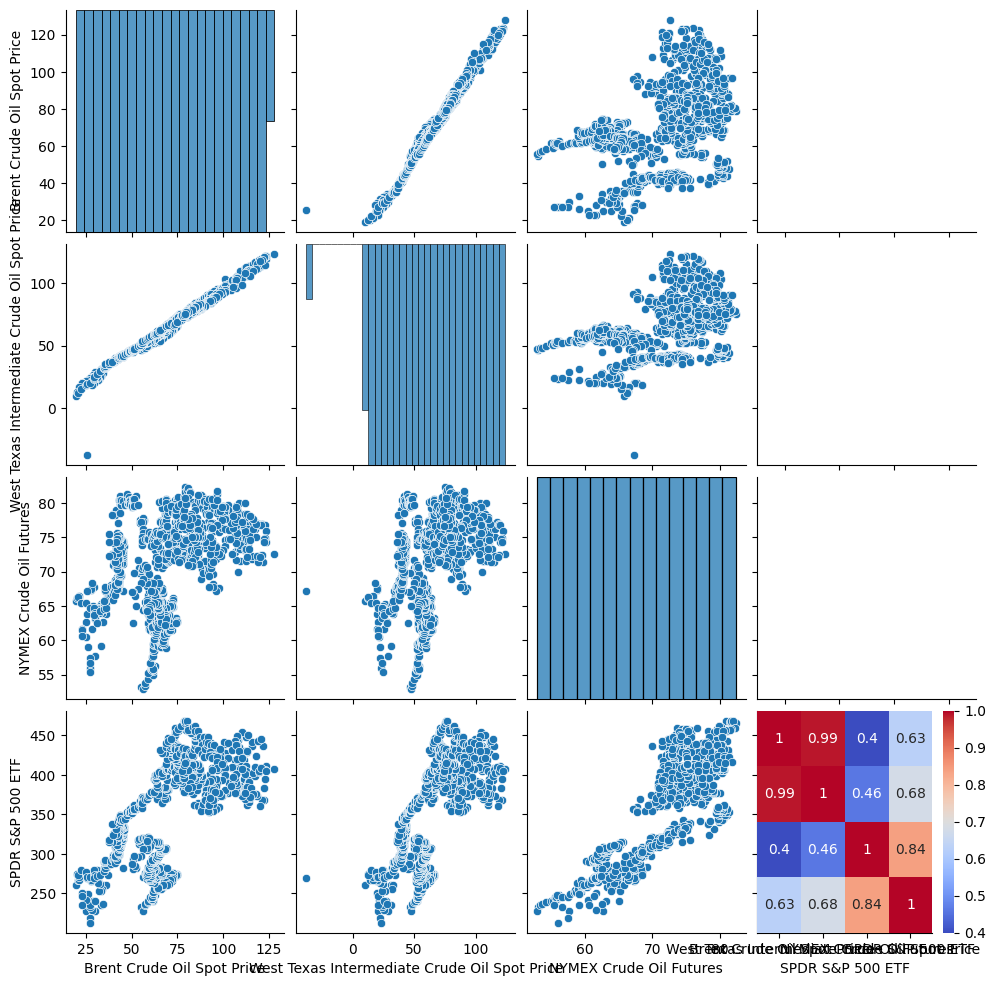

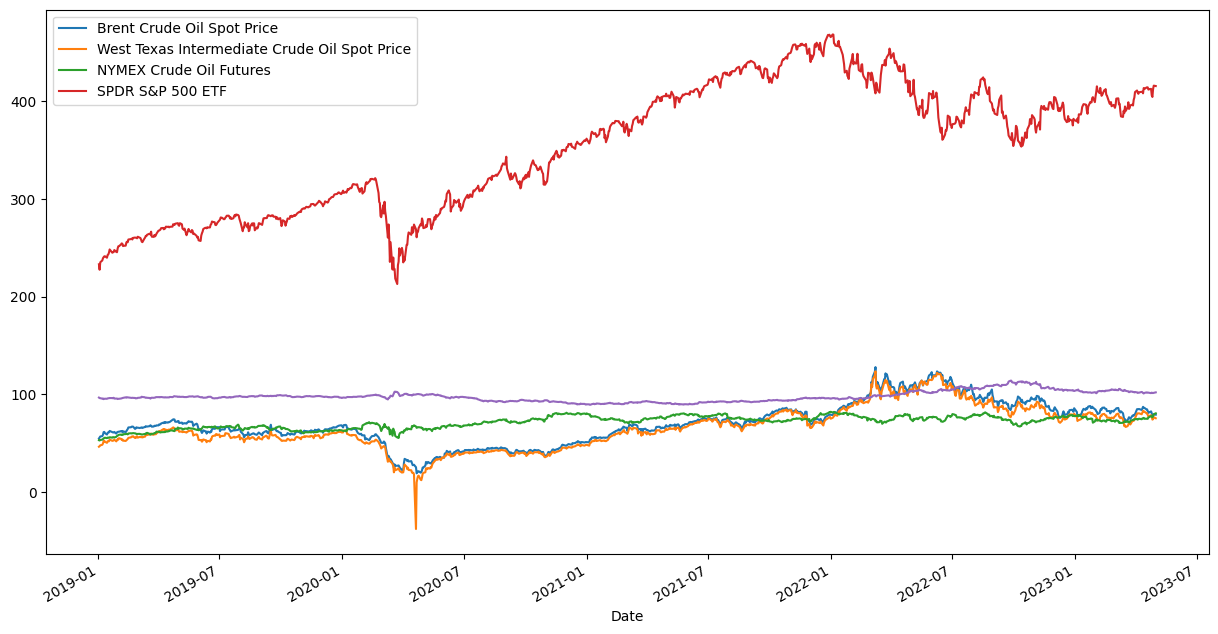

In [ ]:

# Define the list of tickers to download
tickers = ['BZ=F', 'CL=F', 'CL', 'B', 'BNO', 'USO', 'SPY', 'DX-Y.NYB']

# Download historical price data for the tickers
prices = yf.download(tickers, start='2019-01-01', end='2023-05-02')['Adj Close']

# Handle missing values using linear interpolation
prices = prices.interpolate(method='linear')

# Rename the columns using a legend
legend = {'BZ=F': 'Brent Crude Oil Spot Price',
          'CL=F': 'West Texas Intermediate Crude Oil Spot Price',
          'CL': 'NYMEX Crude Oil Futures',
          'B': 'ICE Brent Crude Oil Futures',
          'BNO': 'Crude Oil Brent Europe',
          'USO': 'US Oil Fund',
          'SPY': 'SPDR S&P 500 ETF',
          'DX-Y.NYB': 'US Dollar Index'}
prices.columns = [legend.get(col, col) for col in prices.columns]

# Create a pairplot
sns.pairplot(data=prices[['Brent Crude Oil Spot Price', 'West Texas Intermediate Crude Oil Spot Price',
                          'NYMEX Crude Oil Futures', 'SPDR S&P 500 ETF']])

# Create a heatmap of the correlation matrix
sns.heatmap(prices[['Brent Crude Oil Spot Price', 'West Texas Intermediate Crude Oil Spot Price',
                     'NYMEX Crude Oil Futures', 'SPDR S&P 500 ETF']].corr(),
            annot=True, cmap='coolwarm')

# Plot the time series of the selected tickers
prices[['Brent Crude Oil Spot Price', 'West Texas Intermediate Crude Oil Spot Price',
        'NYMEX Crude Oil Futures', 'SPDR S&P 500 ETF']].plot(figsize=(15, 8))

# Plot the time series of the US Dollar Index
prices['US Dollar Index'].plot(figsize=(15, 8))

# Show the plots
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MTESTUS1m.csv to MTESTUS1m.csv
Saving MTTNTUS2m.csv to MTTNTUS2m.csv
Saving PET_CONS_PSUP_DC_NUS_MBBL_M.csv to PET_CONS_PSUP_DC_NUS_MBBL_M.csv
Saving PET_CRD_CRPDN_ADC_MBBL_M.csv to PET_CRD_CRPDN_ADC_MBBL_M.csv
Saving PET_PRI_SPT_S1_M.csv to PET_PRI_SPT_S1_M.csv


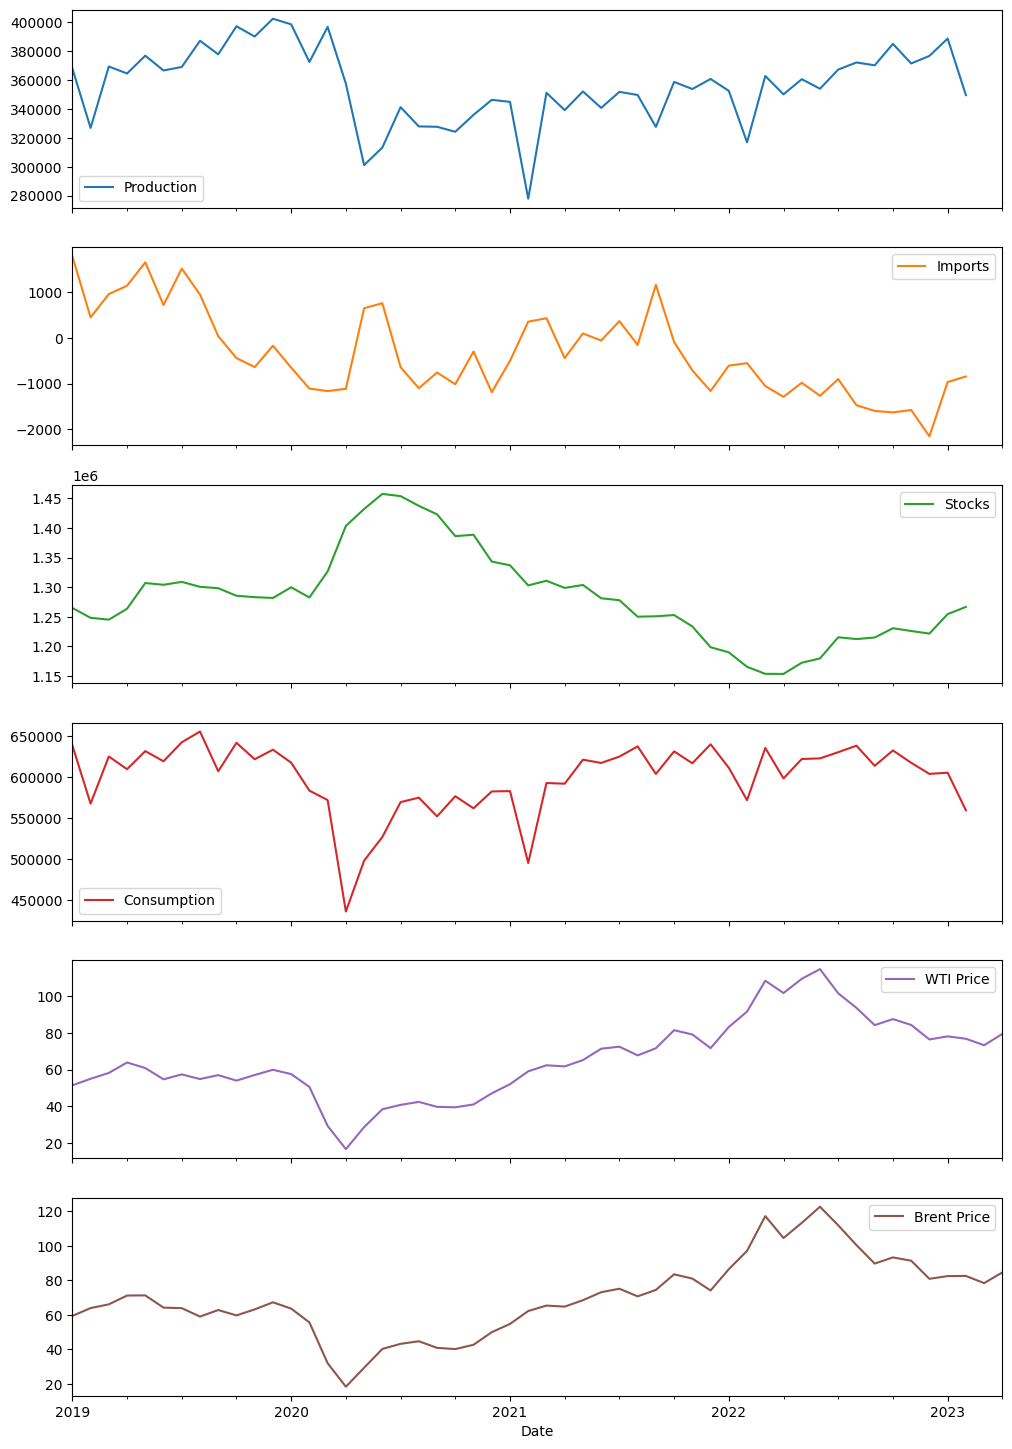

In [ ]:
production_df = pd.read_csv('PET_CRD_CRPDN_ADC_MBBL_M.csv', sep=";", index_col='Date')
imports_df = pd.read_csv('MTTNTUS2m.csv', sep=";", index_col='Date')
stocks_df = pd.read_csv('MTESTUS1m.csv', sep=";", index_col='Date')
consumption_df = pd.read_csv('PET_CONS_PSUP_DC_NUS_MBBL_M.csv', sep=";", index_col='Date')
spot_df = pd.read_csv('PET_PRI_SPT_S1_M.csv', sep=";", index_col='Date')

df = pd.concat([production_df, imports_df, stocks_df, consumption_df, spot_df], axis=1)
df.index = pd.to_datetime(df.index)
df.columns=['Production', 'Imports', 'Stocks', 'Consumption', 'WTI Price', 'Brent Price']
df = df.loc[(df.index >= '2019-01-01')]

df.plot(subplots=True, figsize=(12, 18));

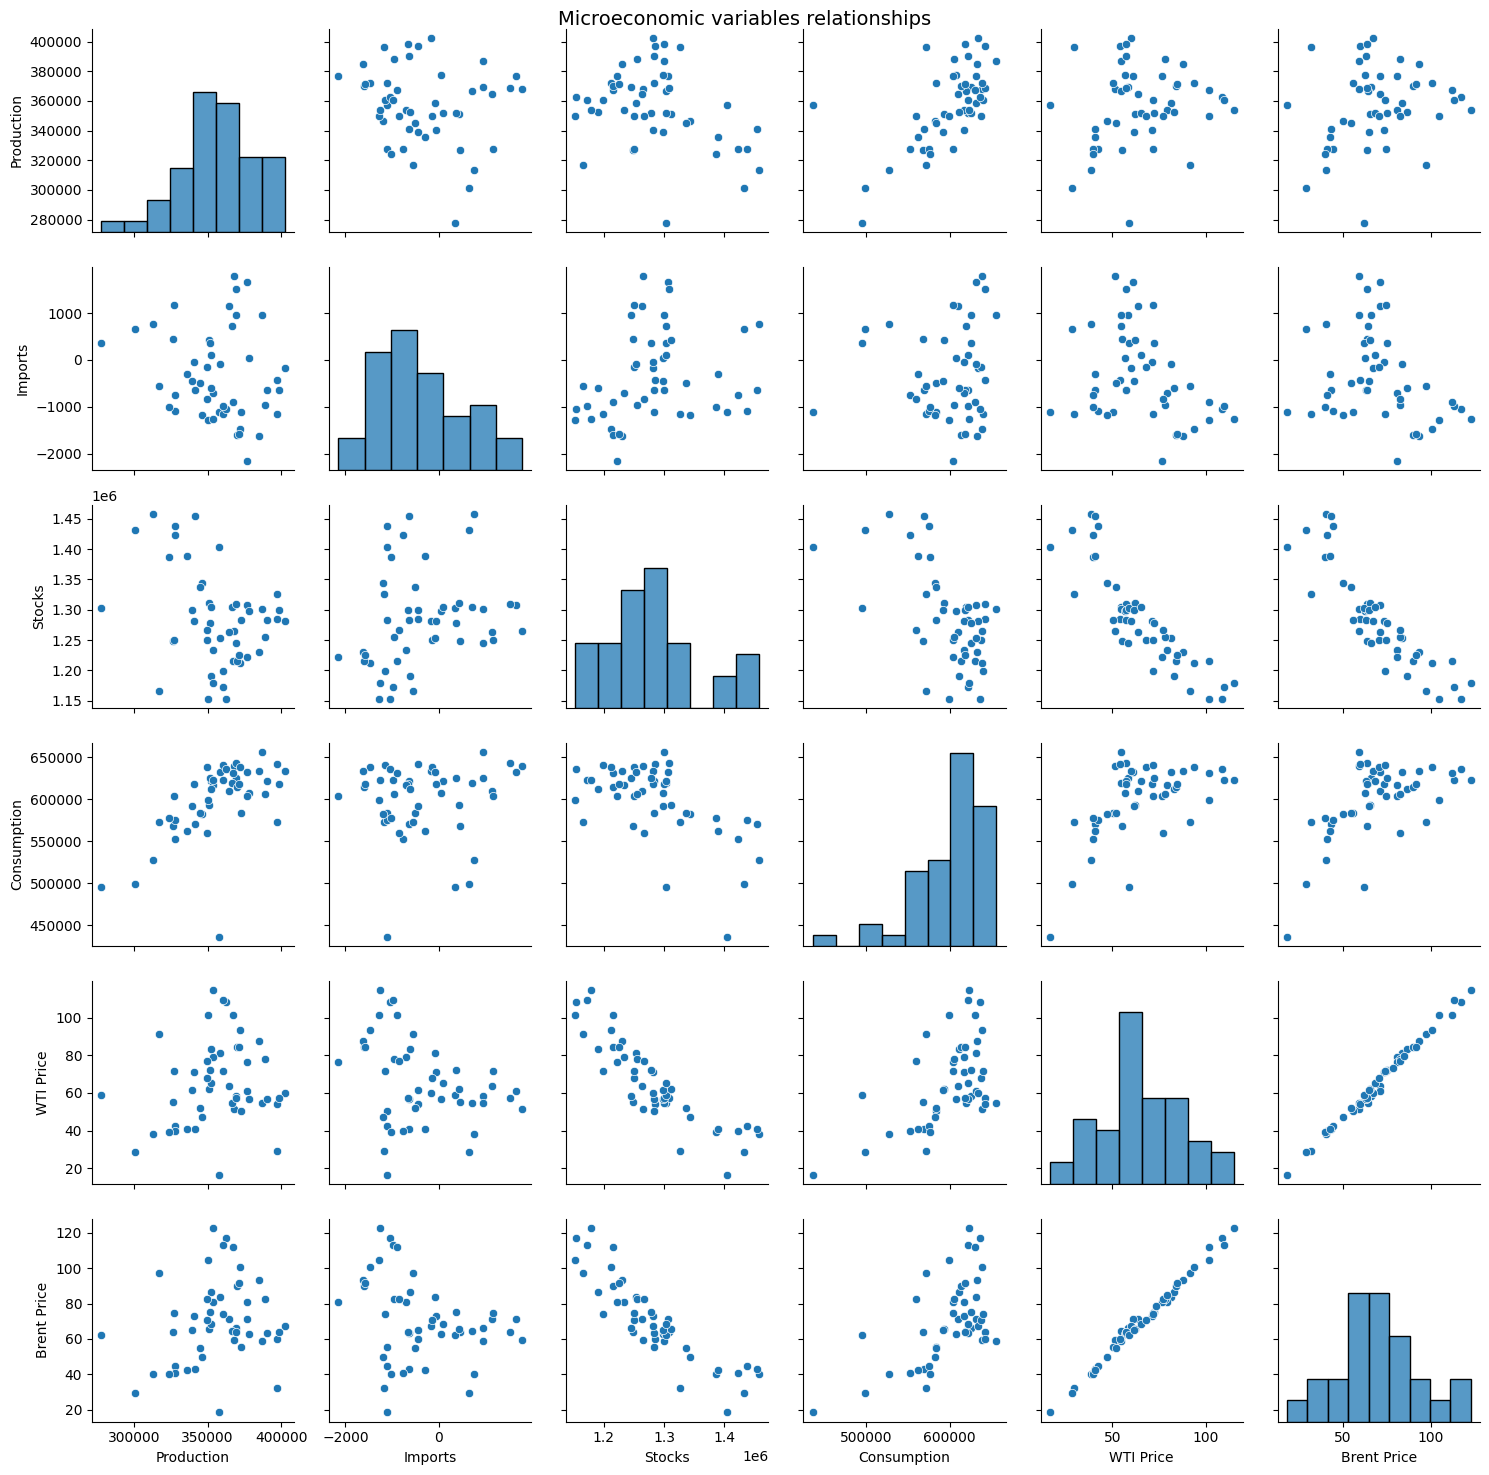

In [ ]:
sns.pairplot(df)
plt.suptitle('Microeconomic variables relationships', fontsize=14)
plt.subplots_adjust(top=0.9)
plt.tight_layout()

## 3 Variables that affect the price of oil globally

### Student A: Macroeconomic /Geopolitical Specialist

### 3.1. Identifying the data

The following datasets were selected from FRED website (https://fred.stlouisfed.org/series/) to be used:

As the macroeconomic/geopolitical specialist, student A chose Macroeconomic and Geopolitical Data as follow:

1. Interest rates: Interest rate changes have an impact on currency values, which can have an effect on oil demand. Higher interest rates often increase the cost of business fundings and make currencies appreciated in the short termstronger, which lowers the demand for oil and lowers oil prices, respectively. Student A chose Interest Rates, Discount Rate for United States (INTDSRUSM193N)

2. Gross Domestic Product (GDP): The demand for oil is significantly influenced by a country or region's GDP. Oil prices rise as a result of increasing oil use in nations with high GDPs for manufacturing, transportation, and other industrial uses. Student A chose Global Economic Policy Uncertainty Index: Current Price Adjusted GDP (GEPUCURRENT).

3. Inflation Levels: The cost of oil can also be impacted by inflation. Oil prices may rise as a result of rising production and transportation costs as a result of inflation. Student A chose 30-year Breakeven Inflation Rate (T30YIEM)

4. Political Situations: Conflicts, tensions, and political instability on a global scale can significantly affect oil supply and demand. Oil supply disruptions, such as those caused by Middle Eastern conflicts or sanctions on oil-producing nations, can raise oil prices. Student A chose Equity Market Volatility Tracker: Elections And Political Governance (EMVELECTGOVRN) monthly data

5. Unemployment rate: The unemployment rate can affect the goods comsumption and production, which will influence the demand for oil and oil prices. Student A chose Unemployment Rate - Black or African American (LNS14000006)

6. OPEC: The Organization of the Petroleum Exporting Countries (OPEC) is in charge of a substantial amount of the oil supply in the world. The price of oil may be greatly impacted by any decision made by OPEC about production quantities and costs. Student A chose U.S. Imports of Goods by Customs Basis from OPEC (IMP0001)

7. Crude Oil Spot Price: This is what we are going to predict. Student A chose West Texas Intermediate (WTI) Spot Crude Oil Price monthly data (WTISPLC)

### 3.2 Importing the data

In [ ]:
!pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import fredapi as fa
import datetime
import matplotlib.pyplot as plt

In [ ]:
fred = fa.Fred(api_key='7f2fb5454781e32d15322a8528859795')

#### 3.2 Importing the data

In [ ]:
def get_fred_data(dataset, start_date, end_date):
    df = pdr.DataReader(dataset, "fred", start_date, end_date)
    return df.reset_index()

In [ ]:
# Given the 30x rule of thumb, 10 years data should be enough.
start_date = "2013-05-01"
end_date = "2023-04-30"

In [ ]:
# Data Retrieval
datasets = ['INTDSRUSM193N', 'GEPUCURRENT', 'T30YIEM', 'EMVELECTGOVRN', 'LNS14000006', 'IMP0001', 'WTISPLC']
dataframe = get_fred_data(datasets, start_date, end_date)
dataframe.head()

,DATE,GEPUCURRENT,T30YIEM,EMVELECTGOVRN,LNS14000006,WTISPLC
0,2013-05-01,106.458666,2.39,0.19880,13.4,94.80
1,2013-06-01,120.419787,2.19,0.09762,14.2,95.80
2,2013-07-01,107.936845,2.27,0.20967,12.6,104.61
3,2013-08-01,118.641079,2.32,0.25779,12.8,106.57
4,2013-09-01,132.719077,2.29,0.17147,13.0,106.29


#### 3.3 Structuring the data

In [ ]:
column_names = {
    'DATE':'Date',
    'INTDSRUSM193N':'Interest',
    'GEPUCURRENT':'GDP',
    'T30YIEM':'Inflation',
    'EMVELECTGOVRN':'Political',
    'LNS14000006':'Unemployment',
    'IMP0001':'OPEC',
    'WTISPLC':'WTISPLC'
  }

In [ ]:
df = dataframe
df.rename(columns = column_names, inplace = True)
df.head()

,Date,GDP,Inflation,Political,Unemployment,WTISPLC
0,2013-05-01,106.458666,2.39,0.19880,13.4,94.80
1,2013-06-01,120.419787,2.19,0.09762,14.2,95.80
2,2013-07-01,107.936845,2.27,0.20967,12.6,104.61
3,2013-08-01,118.641079,2.32,0.25779,12.8,106.57
4,2013-09-01,132.719077,2.29,0.17147,13.0,106.29


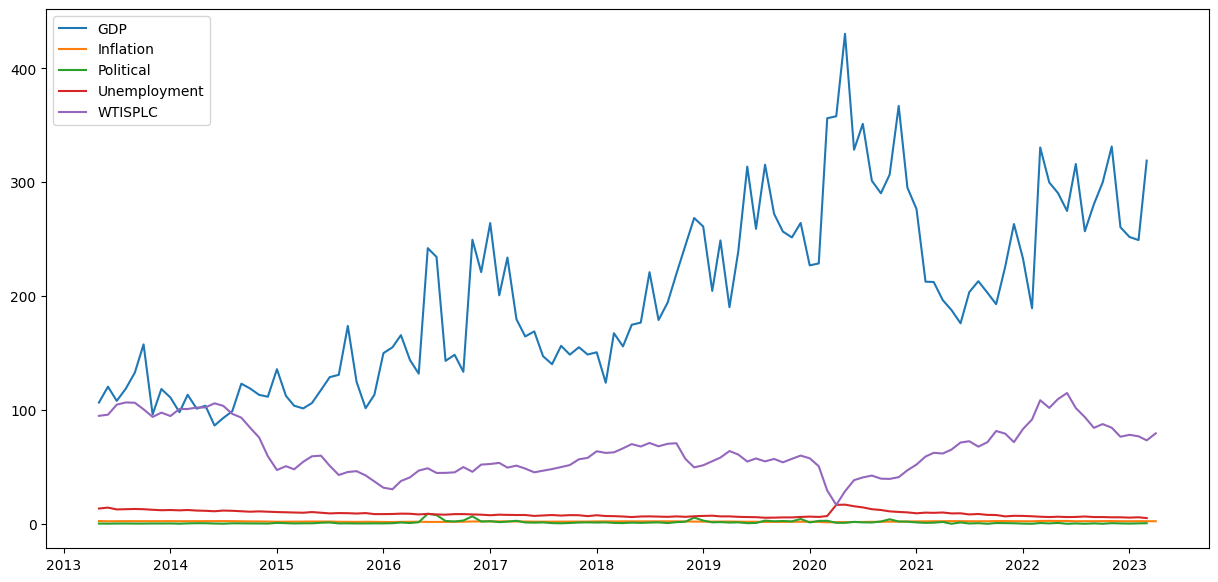

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Date'], df['GDP'], label='GDP')
plt.plot(df['Date'], df['Inflation'], label='Inflation')
plt.plot(df['Date'], df['Political'], label='Political')
plt.plot(df['Date'], df['Unemployment'], label='Unemployment')
plt.plot(df['Date'], df['WTISPLC'], label='WTISPLC')
plt.legend(loc='upper left')
plt.show()

### Step 4 Data Dictionary: Student A

In [ ]:
data_dictionary = {
    "Gross Domestic Product" : {
        "Description":"Global Economic Policy Uncertainty Index: Current Price Adjusted GDP",
        "Source": "U.S. Bureau of Economic Analysis",
        "Code":"GEPUCURRENT",
        "Frequency": "Monthly",
        "Category":"Academic Data, Policy Uncertainty",
        "Unit":"Index",
        "Start Date":start_date,
        "End Date":end_date
    },
    "Interest Rates":{
        "Description":"Interest Rates, Discount Rate for United States",
        "Source":"International Monetary Fund",
        "Code":"INTDSRUSM193N",
        "Frequency":"Monthly",
        "Category":"International Data",
        "Unit":"Percent per Annum",
        "Start Date":start_date,
        "End Date":end_date
    },
    "Inflation Levels":{
        "Description":"30-year Breakeven Inflation Rate",
        "Source":"Federal Reserve Bank of St. Louis",
        "Code":"T30YIEM",
        "Frequency":"Monthly",
        "Category":"Money, Banking, & Finance",
        "Unit":"Percent",
        "Start Date":start_date,
        "End Date":end_date
    },
    "Political Situations": {
        "Description":"Equity Market Volatility Tracker: Elections And Political Governance",
        "Source":"Baker, Scott R.; Bloom, Nick; Davis, Stephen J.",
        "Code":"EMVELECTGOVRN",
        "Frequency":"Monthly",
        "Category":"Academic Data",
        "Unit":"Index",
        "Start Date":start_date,
        "End Date":end_date
    },
    'Unemployment':{
        "Description":"Unemployment Rate - Black or African American",
        "Source":"U.S. Bureau of Labor Statistics",
        "Code":"LNS14000006",
        "Frequency":"Monthly",
        "Category":"Population, Employment, & Labor Markets",
        "Unit":" Percent",
        "Start Date":start_date,
        "End Date":end_date
    },
    "OPEC":{
        "Description":"U.S. Imports of Goods by Customs Basis from OPEC",
        "Source":"U.S. Census Bureau; U.S. Bureau of Economic Analysis",
        "Code":"IMP0001",
        "Frequency":"Monthly",
        "Category":"International Data",
        "Unit":"Millions of Dollars",
        "Start Date":start_date,
        "End Date":end_date
    },
    "Oil Price":{
        "Description":"Spot Crude Oil Price: West Texas Intermediate (WTI)",
        "Source":"Federal Reserve Bank of St. Louis",
        "Code":"WTISPLC",
        "Frequency":"Monthly",
        "Category":"Commodity Prices",
        "Unit":"Dollars per Barrel",
        "Start Date":start_date,
        "End Date":end_date
    }
}

In [ ]:
datadictionary = pd.DataFrame.from_dict(data_dictionary, orient ='index')
datadictionary.reset_index(inplace=True)
datadictionary.rename(columns={'index':'Data Name'})

,Data Name,Description,Source,Code,Frequency,Category,Unit,Start Date,End Date
0,Gross Domestic Product,Global Economic Policy Uncertainty Index: Curr...,U.S. Bureau of Economic Analysis,GEPUCURRENT,Monthly,"Academic Data, Policy Uncertainty",Index,2013-05-01,2023-04-30
1,Interest Rates,"Interest Rates, Discount Rate for United States",International Monetary Fund,INTDSRUSM193N,Monthly,International Data,Percent per Annum,2013-05-01,2023-04-30
2,Inflation Levels,30-year Breakeven Inflation Rate,Federal Reserve Bank of St. Louis,T30YIEM,Monthly,"Money, Banking, & Finance",Percent,2013-05-01,2023-04-30
3,Political Situations,Equity Market Volatility Tracker: Elections An...,"Baker, Scott R.; Bloom, Nick; Davis, Stephen J.",EMVELECTGOVRN,Monthly,Academic Data,Index,2013-05-01,2023-04-30
4,Unemployment,Unemployment Rate - Black or African American,U.S. Bureau of Labor Statistics,LNS14000006,Monthly,"Population, Employment, & Labor Markets",Percent,2013-05-01,2023-04-30
5,OPEC,U.S. Imports of Goods by Customs Basis from OPEC,U.S. Census Bureau; U.S. Bureau of Economic An...,IMP0001,Monthly,International Data,Millions of Dollars,2013-05-01,2023-04-30
6,Oil Price,Spot Crude Oil Price: West Texas Intermediate ...,Federal Reserve Bank of St. Louis,WTISPLC,Monthly,Commodity Prices,Dollars per Barrel,2013-05-01,2023-04-30


### Step 5 Student A: Data Processing

In [ ]:
# Replace Null or missing values
for key, name in column_names.items():
    mean_value = df[name].mean()
    df[name].fillna(mean_value, inplace=True)

### Visualizing outliers

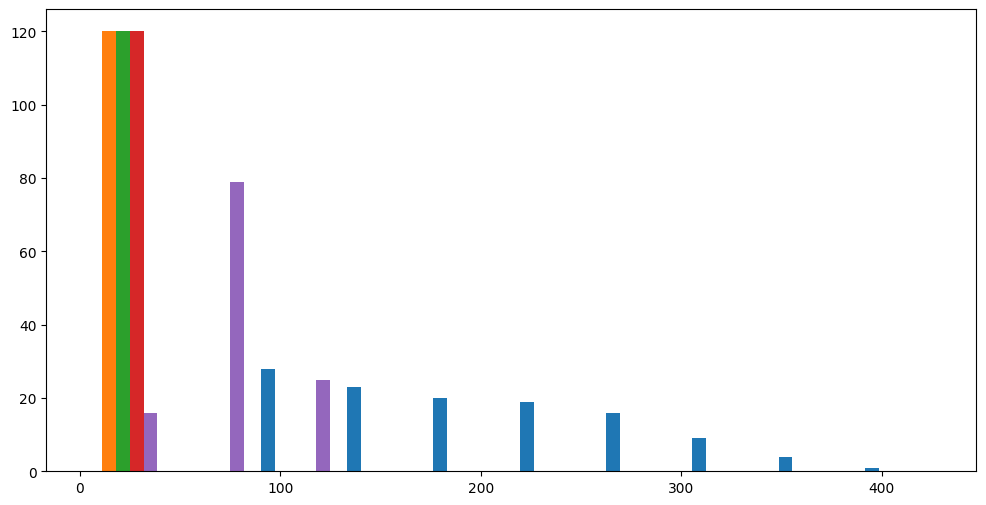

In [ ]:
new_df = df.iloc[:,1:]
plt.figure(figsize=(12,6))
plt.hist(new_df)
plt.show()

The histogram clearly shows existence of outliers on either tails of the distribution

### Step 7 Student A: Distributional plots

In [ ]:
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

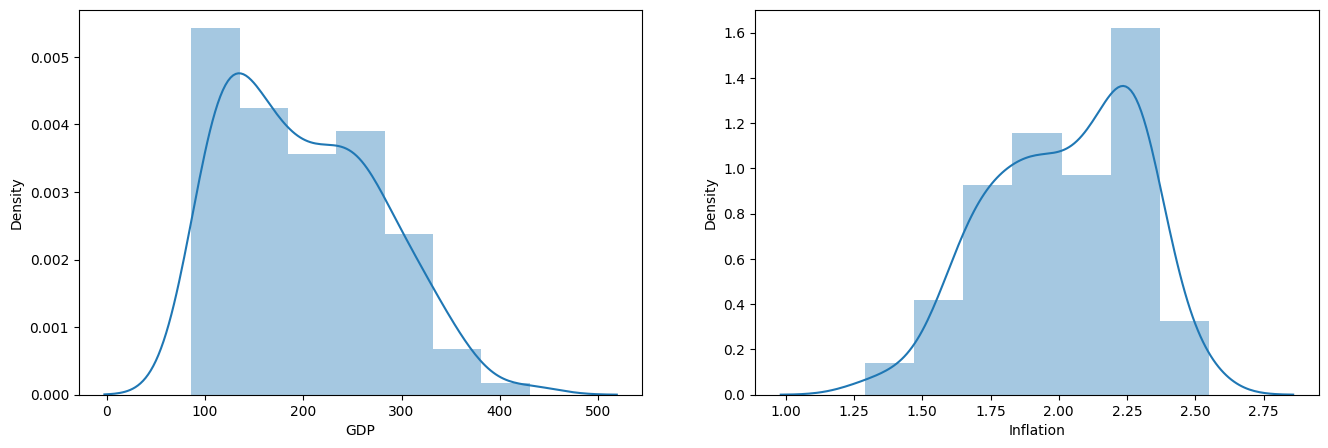

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['GDP'])
plt.subplot(1,2,2)
sns.distplot(df['Inflation'])
plt.show()

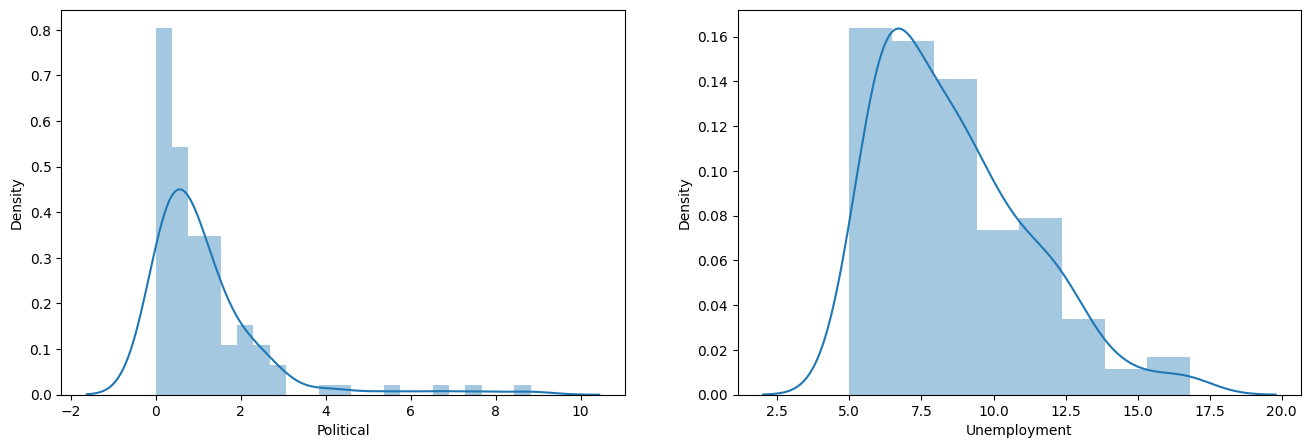

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Political'])
plt.subplot(1,2,2)
sns.distplot(df['Unemployment'])
plt.show()

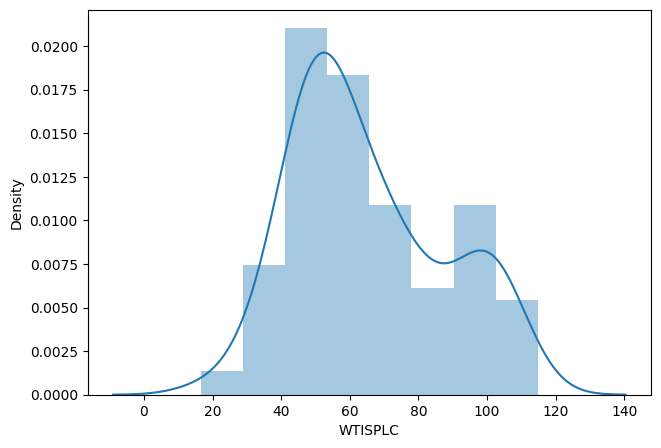

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['WTISPLC'])
plt.show()